### Student Information
Name: Samuel Montes Jr

Student ID: 114065429

GitHub ID: samjun99

---

# Phase 1

## Code Setup and Data Preparation

Similar to the Master exercises, we used the similar code setup for this part.

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import sys
print(sys.executable)
print(sys.version)

import pandas as pd

data = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\samue\Onedrive\Documents\NTHU\1s_fall_25-26\Data_Mining\Assignment\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [2]:
# print the first five records of the dataset to check
print(data.head())

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1     

## Checking for Missing Values

Here, we checked if there's anthing missing values from the data. We can also check the attributes associated to the dataset to see which attributes we can keep for the rest of the exercises.

In [3]:
# check missing values
data.isnull()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [4]:
# Here we try to check the total number of missing values per column

import helpers.data_mining_helpers as dmh

data.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In checking the attributes for missing values, it can be seen that both `downvotes` and `upvote_ratio` has majority of its missing values. In my assumption, a valid reason for this could just mean that theres no vote for that particular record whenever we encounter a missing value.

In this data, I find that the following attributes: `type`, `subreddit`, `title`, `text`, and `label` is much more meaningful and therefore will be used for the suceeding exercises.

In [5]:
data = data[["type", "subreddit", "title", "text", "label"]]

## Category Distribution

In this part, we will try to check the distribution of the dataset. But first, we will need to determine the attribute which will be used for showing the distribution.

We will first plot the distribution of the `subreddit` attribute. We added the count labels on the top of the bars for easier checking.

In [6]:
subreddit_counts = data["subreddit"].value_counts()

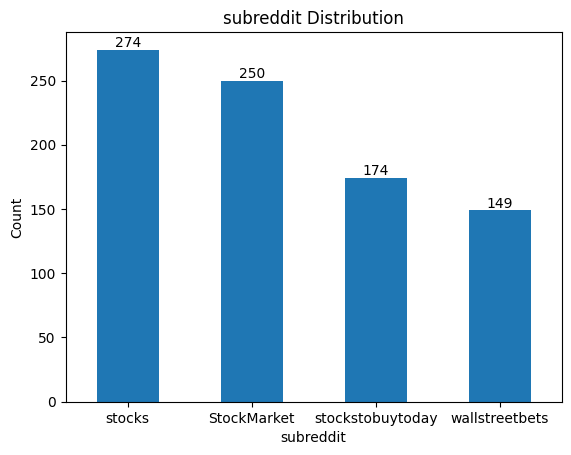

In [7]:
import matplotlib.pyplot as plt

# Plot as bar chart
axes = subreddit_counts.plot(kind="bar", title="subreddit Distribution", rot=0)

plt.xlabel("subreddit")
plt.ylabel("Count")

for container in axes.containers:
    axes.bar_label(container)
    
plt.show()

Now, we will try to plot the distribution of other attributes. We have chosen `type` and `labels` in this case since they are the ones that shares the same values on all records.

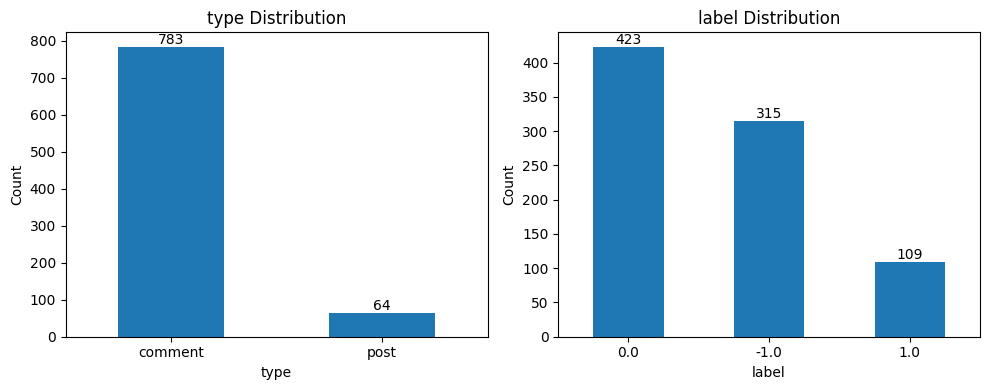

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

data['type'].value_counts().plot(kind='bar', ax=axes[0], title="type Distribution", rot=0)
axes[0].set_xlabel("type")
axes[0].set_ylabel("Count")

for container in axes[0].containers:
    axes[0].bar_label(container)

data['label'].value_counts().plot(kind='bar', ax=axes[1], title="label Distribution", rot=0)
axes[1].set_xlabel("label")
axes[1].set_ylabel("Count")

for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

### With sampling

In this part we will try to do a sampling of the data and check its distribution along with its original data side-by-side. A sampling number of 300 will be used in this case.

In [9]:
data_sample = data.sample(n=300)

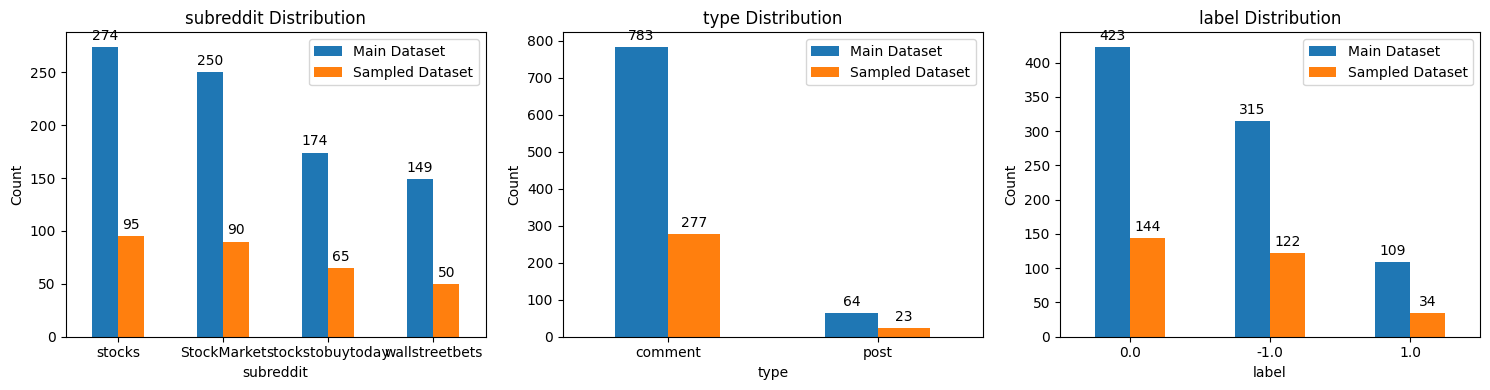

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# First subplot
df1 = pd.DataFrame({
    "Main Dataset": data["subreddit"].value_counts(),
    "Sampled Dataset": data_sample["subreddit"].value_counts()
}).fillna(0).astype(int)

df1.plot(kind='bar', ax=axes[0], title="subreddit Distribution", rot=0)
axes[0].set_xlabel("subreddit")
axes[0].set_ylabel("Count")

for container in axes[0].containers:
    axes[0].bar_label(container, padding=3)

# Second subplot
df2 = pd.DataFrame({
    "Main Dataset": data["type"].value_counts(),
    "Sampled Dataset": data_sample["type"].value_counts()
}).fillna(0).astype(int)

df2.plot(kind='bar', ax=axes[1], title="type Distribution", rot=0)
axes[1].set_xlabel("type")
axes[1].set_ylabel("Count")

for container in axes[1].containers:
    axes[1].bar_label(container, padding=3)

# Third subplot
df3 = pd.DataFrame({
    "Main Dataset": data["label"].value_counts(),
    "Sampled Dataset": data_sample["label"].value_counts()
}).fillna(0).astype(int)

df3.plot(kind='bar', ax=axes[2], title="label Distribution", rot=0)
axes[2].set_xlabel("label")
axes[2].set_ylabel("Count")

for container in axes[2].containers:
    axes[2].bar_label(container, padding=3)

plt.tight_layout()
plt.show()

In this code, we can observe that the pattern of the distribution remains the same even with the sampling method.

## Feature Creation

In this section, we will now try to split the text of all the records into an array of tokens and we will try to visualize them

In [11]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
# obtain unigrams for each text and add to the dataset

data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text)

In [14]:
data_counts.shape

(847, 4346)

In [15]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
plot_z = data_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In this part, we will now try to recreate the plot using `seaborn` and in the sucessive parts, we will try to rereate other ways to visualize them.

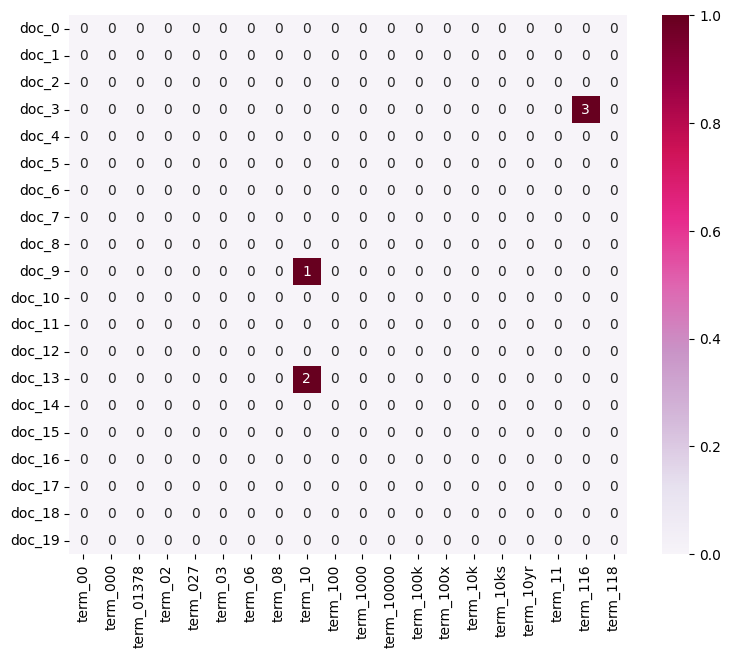

In [16]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

I tried to plot using the new dataset using the style from `exercise 11` in the master file.

<Axes: >

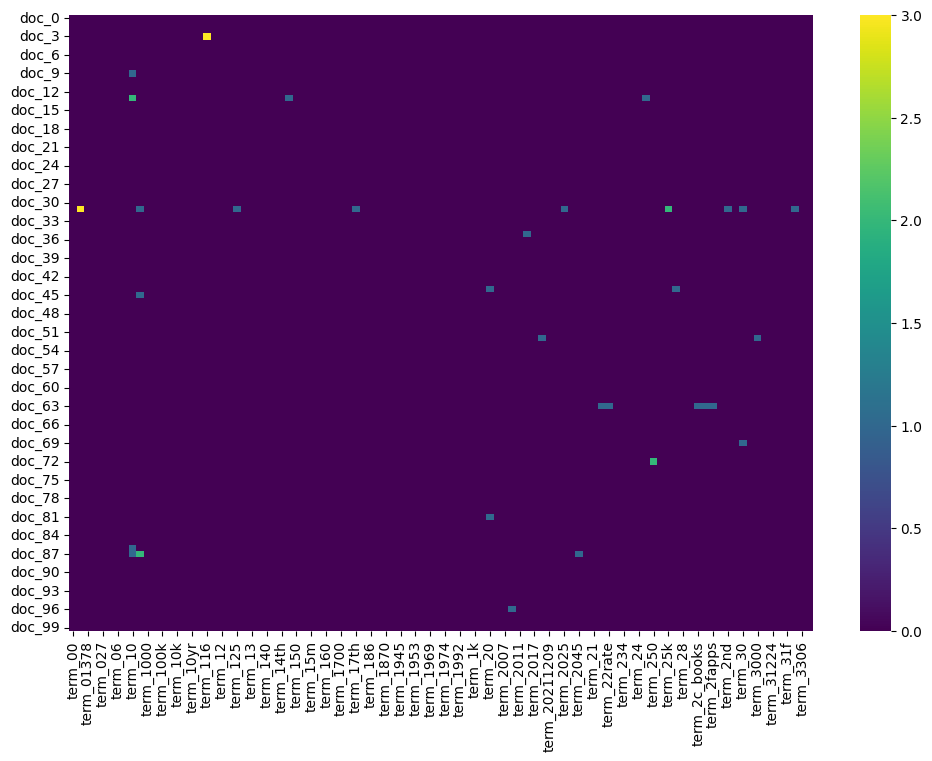

In [17]:
term_len = 100
doc_len = 100

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:term_len]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:doc_len]]
plot_z = data_counts[0:doc_len, 0:term_len].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(12, 8))
sns.heatmap(df_todraw, cmap="viridis", cbar=True)

## Other ways to visualize

In this section, we will now try to use other ways to visualize the tokenized text to see how they appear frequently.

### Word Cloud

A word cloud tell us how frequent a term is being used by lokking its font size, the larger the text, the more frequent it is.

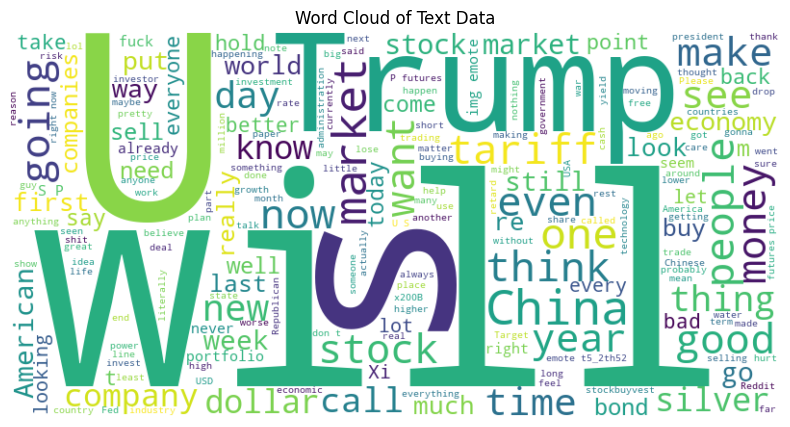

In [18]:
from wordcloud import WordCloud
text = ' '.join(data['text'])  # replace with your text column name
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Text Data")
plt.show()

### Frequency chart

The frequency chart shows us the top words being used using bar chart.

C:\Users\samue\AppData\Local\Temp\ipykernel_2644\1833368691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_terms, x='term', y='count', palette='viridis')


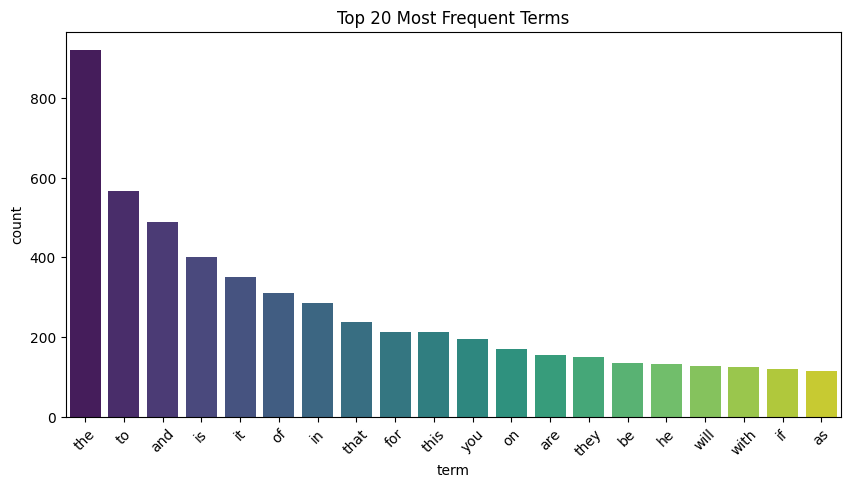

In [19]:
term_freq = np.array(data_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()
term_df = pd.DataFrame({'term': terms, 'count': term_freq})
top_terms = term_df.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(10,5))
sns.barplot(data=top_terms, x='term', y='count', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Terms")
plt.show()


### PCA Scatter Plot

This plot shows the documents projected into two dimensions using **Principal Component Analysis (PCA)**.  
Each point represents one document, and the position is determined by patterns in the words used.  

- **X-axis (PC1)** shows the direction of greatest variation in the dataset.  
- **Y-axis (PC2)** shows the second most significant pattern, uncorrelated with the first.
- 
Documents that appear **close together** have **similar word usage**, while those **far apart** differ more in their content.

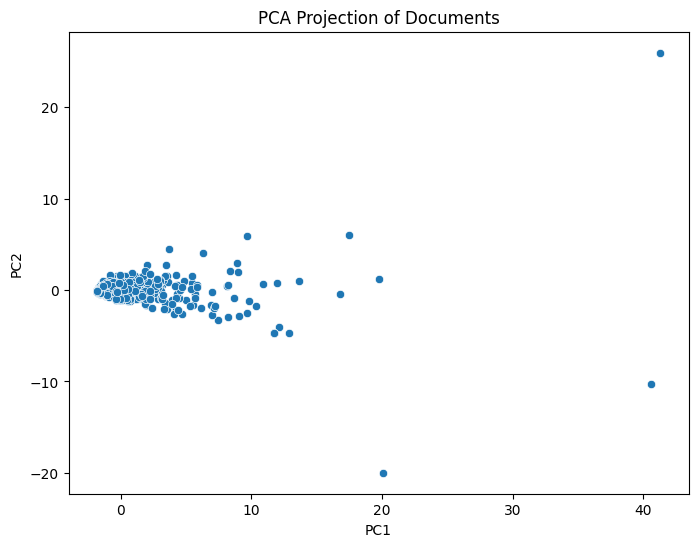

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(data_counts.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1])
plt.title("PCA Projection of Documents")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## Transform Text Data

In this part, we will extract the word frequency of the `text` field in the dataset. Similar to the one we just showed in the plot of the most frequently used words but with more terms.

In [21]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

For easier readability, we will only show up to 300 terms.

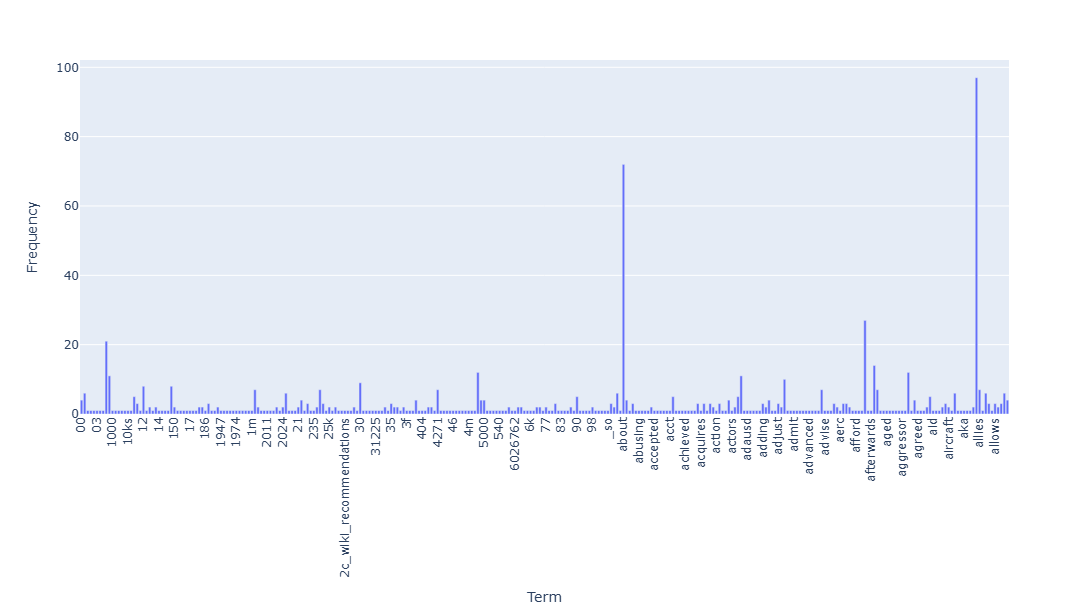

In [22]:
import plotly.express as px

# instead of seaborn barplot
fig = px.bar(x=count_vect.get_feature_names_out()[:300],
             y=term_frequencies[:300],
             labels={"x": "Term", "y": "Frequency"})

# rotate labels for readability
fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)
fig.show()

We will now then sort the terms to see its behavior.

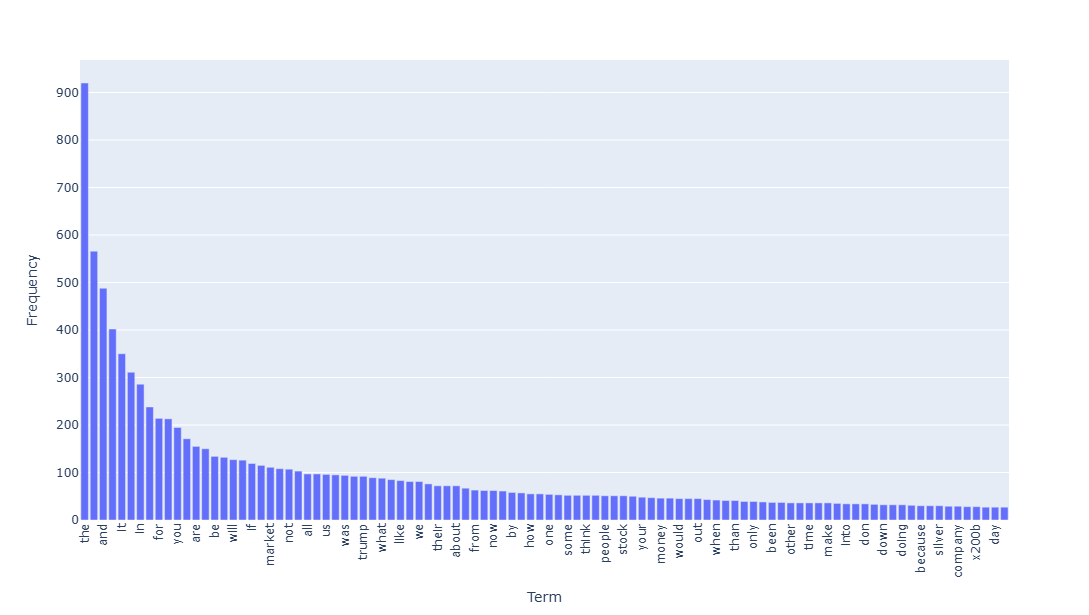

In [23]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
})

# sort by frequency (descending)
df_terms = df_terms.sort_values("frequency", ascending=False)
df_terms_sorted = df_terms[:100]

# plot sorted bar chart
fig = px.bar(df_terms_sorted,
             x="term",
             y="frequency",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)
fig.show()

### Transform into log scale

We will now transform the data into log scale for more easier readability.

In [24]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\samue\AppData\Local\Temp\ipykernel_2644\1137108418.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



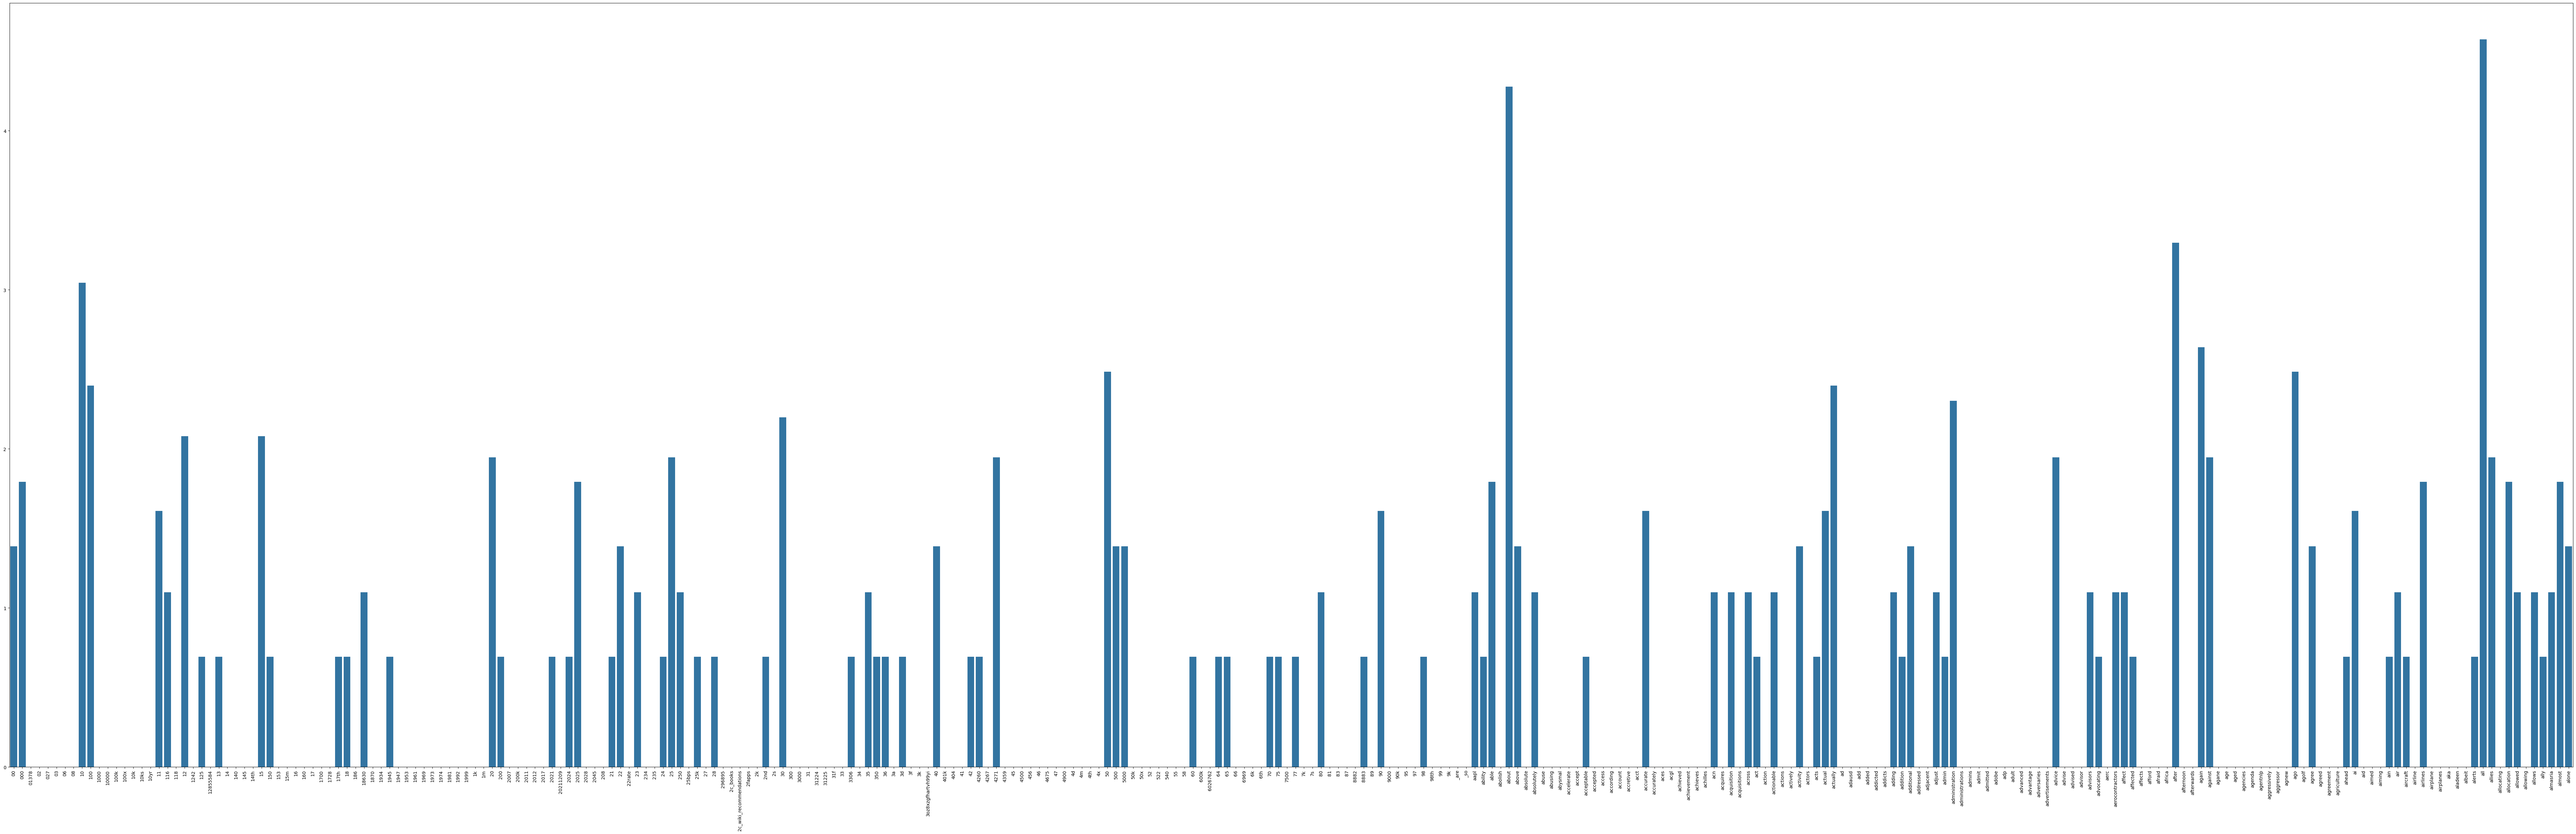

In [25]:
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Next, we will sort them

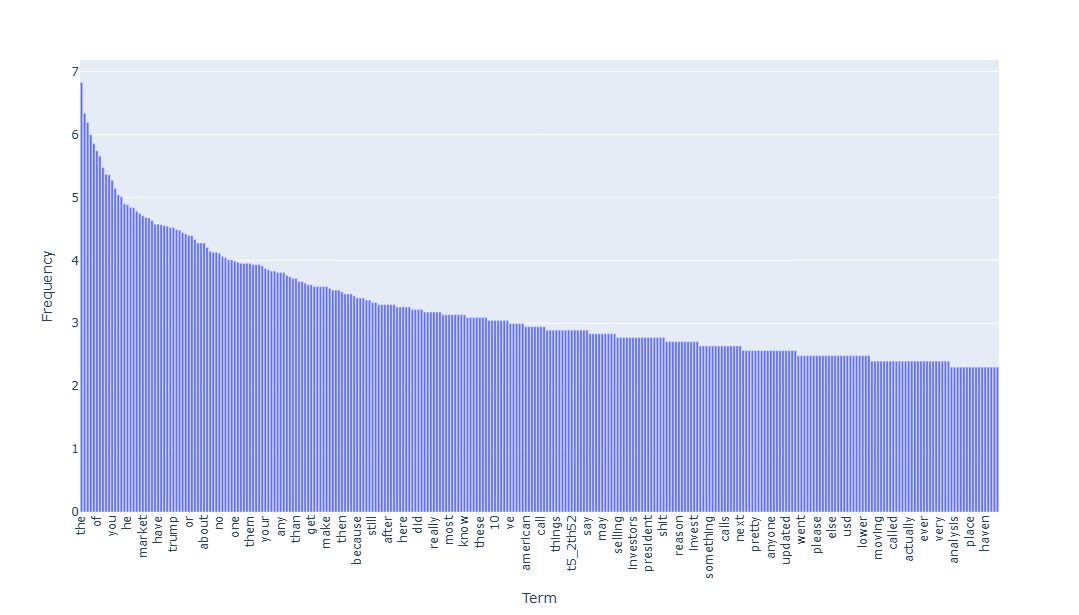

In [26]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies_log
})

# sort by frequency (descending)
df_terms = df_terms.sort_values("frequency", ascending=False)
df_terms_sorted = df_terms[:300]

# plot sorted bar chart
fig = px.bar(df_terms_sorted,
             x="term",
             y="frequency",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)
fig.show()